In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np

In [3]:
data = pd.read_csv('Datasets/Positive&Negative.csv')
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [4]:
x = data['review']
x = x.str.strip().str.lower()
x.head()

0    privacy at least put some option appear offlin...
1    messenger issues ever since the last update, i...
2    profile any time my wife or anybody has more t...
3    the new features suck for those of us who don'...
4    forced reload on uploading pic on replying com...
Name: review, dtype: object

In [5]:
y = data['polarity']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: polarity, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

In [7]:
vec = CountVectorizer(stop_words='english')
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

In [8]:
print(x_train), print(x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(None, None)

In [9]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
model.score(x_test, y_test)

0.8565022421524664

In [11]:
y_pred = model.predict(x_test)

confu = confusion_matrix(y_test, y_pred)
print(confu)

[[140   6]
 [ 26  51]]


In [12]:
print("Accuracy Score : "+ str(accuracy_score(y_test, y_pred)))

Accuracy Score : 0.8565022421524664


In [13]:
print("Recall Score : "+ str(recall_score(y_test, y_pred)))

Recall Score : 0.6623376623376623


In [14]:
print("Precision Score : "+ str(precision_score(y_test, y_pred)))

Precision Score : 0.8947368421052632


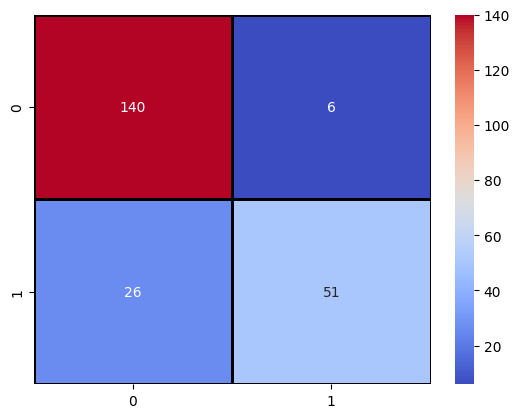

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confu, cmap='coolwarm', annot=True, linewidths=2, linecolor='black', fmt="d")
plt.show()